In [ ]:
# Import all dependencies
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os
from datetime import datetime
import holidays
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
us_holidays=holidays.US()

In [2]:
# Get the holiday names
def k(x):
    if x['Holiday']:
        return us_holidays.get(x['date'])
    else:
        return "NoHoliday"
    
# Get the holidays from Calendar

dr = pd.date_range(start='2011-01-01', end='2050-12-31')
cal = calendar()
holidays = cal.holidays(start=dr.min(), end=dr.max()) 

In [3]:
# Read as csv

df = pd.read_csv( "toy_story_mania.csv")

# Cleanup the data to remove blank times and -999 for unavaiable data
df=df.dropna(subset=['SPOSTMIN'])
df = df[df['SPOSTMIN']>=0]

# Data functions for date and datetime fields for further calculations
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])

# Create Time percentage as a feature
df['time_pct'] = df.datetime.apply(lambda time: (time.hour * 60 + time.minute) / (24 * 60))

# Convert date field in meaningful features

L = ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter','is_month_start','is_month_end','is_quarter_start']
df = df.join(pd.concat((getattr(df['date'].dt, i).rename(i) for i in L), axis=1))


    
# Scale the data by bringing them as max 1
df['month'] = df['month'] / 12.0
df['day'] = df['day'] / 31.0
df['dayofweek'] = df['dayofweek'] / 6.0 
df['dayofyear'] = df['dayofyear'] / 366.0
df['weekofyear'] = df['weekofyear'] / 53.0
df['quarter'] = df['quarter'] / 4.0    


# Find if a date was a holiday

df['Holiday'] = df['date'].isin(holidays)
df['holidaynames'] = df['date'].apply(lambda row: us_holidays.get(row))

In [4]:
df = pd.get_dummies(df, columns=['holidaynames'])

In [5]:
# Create bins for wait times
df['post_bin'] = pd.cut(df['SPOSTMIN'], [0,1,2,3,4,5,6,8,10,12,14,15,18,20,25,30,35,40,45,60,90], right=False)
# Create dummies for the y axis 
target = pd.get_dummies(df['post_bin'])

In [ ]:
df.head(20)

In [6]:
# Pick the X axis- featues
data=df.drop(columns=['date', 'datetime', 'SPOSTMIN', 'SACTMIN', 'year','post_bin'])
columns=data.columns
print(columns)
data.head()

Index(['time_pct', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear',
       'quarter', 'is_month_start', 'is_month_end', 'is_quarter_start',
       'Holiday', 'holidaynames_Christmas Day',
       'holidaynames_Christmas Day (Observed)', 'holidaynames_Columbus Day',
       'holidaynames_Independence Day',
       'holidaynames_Independence Day (Observed)', 'holidaynames_Labor Day',
       'holidaynames_Martin Luther King, Jr. Day', 'holidaynames_Memorial Day',
       'holidaynames_New Year's Day', 'holidaynames_New Year's Day (Observed)',
       'holidaynames_Thanksgiving', 'holidaynames_Veterans Day',
       'holidaynames_Veterans Day (Observed)',
       'holidaynames_Washington's Birthday'],
      dtype='object')


,time_pct,month,day,dayofweek,dayofyear,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start,...,holidaynames_Independence Day (Observed),holidaynames_Labor Day,"holidaynames_Martin Luther King, Jr. Day",holidaynames_Memorial Day,holidaynames_New Year's Day,holidaynames_New Year's Day (Observed),holidaynames_Thanksgiving,holidaynames_Veterans Day,holidaynames_Veterans Day (Observed),holidaynames_Washington's Birthday
0,0.446528,0.083333,0.032258,1.0,0.002732,0.981132,0.25,True,False,True,...,0,0,0,0,1,0,0,0,0,0
1,0.511111,0.083333,0.032258,1.0,0.002732,0.981132,0.25,True,False,True,...,0,0,0,0,1,0,0,0,0,0
2,0.543056,0.083333,0.032258,1.0,0.002732,0.981132,0.25,True,False,True,...,0,0,0,0,1,0,0,0,0,0
3,0.567361,0.083333,0.032258,1.0,0.002732,0.981132,0.25,True,False,True,...,0,0,0,0,1,0,0,0,0,0
4,0.655556,0.083333,0.032258,1.0,0.002732,0.981132,0.25,True,False,True,...,0,0,0,0,1,0,0,0,0,0


In [7]:
#Split the data in train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

X_train
# X_test
# y_train
# y_test

,time_pct,month,day,dayofweek,dayofyear,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start,...,holidaynames_Independence Day (Observed),holidaynames_Labor Day,"holidaynames_Martin Luther King, Jr. Day",holidaynames_Memorial Day,holidaynames_New Year's Day,holidaynames_New Year's Day (Observed),holidaynames_Thanksgiving,holidaynames_Veterans Day,holidaynames_Veterans Day (Observed),holidaynames_Washington's Birthday
131987,0.650694,1.000000,0.322581,0.500000,0.939891,0.943396,1.00,False,False,False,...,0,0,0,0,0,0,0,0,0,0
50965,0.643750,1.000000,0.580645,0.333333,0.961749,0.962264,1.00,False,False,False,...,0,0,0,0,0,0,0,0,0,0
229674,0.890972,0.416667,0.548387,0.500000,0.374317,0.377358,0.50,False,False,False,...,0,0,0,0,0,0,0,0,0,0
96855,0.754861,0.250000,0.096774,0.166667,0.169399,0.188679,0.25,False,False,False,...,0,0,0,0,0,0,0,0,0,0
91114,0.656250,0.083333,0.612903,0.000000,0.051913,0.075472,0.25,False,False,False,...,0,0,1,0,0,0,0,0,0,0
236360,0.478472,0.583333,0.419355,0.666667,0.530055,0.528302,0.75,False,False,False,...,0,0,0,0,0,0,0,0,0,0
48257,0.806250,0.916667,0.645161,0.333333,0.885246,0.886792,1.00,False,False,False,...,0,0,0,0,0,0,0,0,0,0
119137,0.515972,0.666667,0.419355,0.500000,0.614754,0.622642,0.75,False,False,False,...,0,0,0,0,0,0,0,0,0,0
124777,0.456944,0.833333,0.193548,0.166667,0.762295,0.773585,1.00,False,False,False,...,0,0,0,0,0,0,0,0,0,0
25965,0.759722,0.416667,0.516129,0.500000,0.371585,0.377358,0.50,False,False,False,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# first, create a normal neural network with 10 inputs, 3 hidden nodes, and 20 outputs LIner as we need waittimes
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=25))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=20, activation='softmax'))

C:\Users\reema\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [ ]:
model.summary()

In [24]:
#Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#model.compile(optimizer="adam", loss="mean_squared_error")

In [ ]:
y_train.describe()

In [25]:
# Fit the model
model.fit(X_train, y_train, epochs=500)

Epoch 1/500
186270/186270 [==============================] - 6s 33us/step - loss: 0.9969 - acc: 0.4140
Epoch 2/500
186270/186270 [==============================] - 6s 33us/step - loss: 0.9974 - acc: 0.4131
Epoch 3/500
186270/186270 [==============================] - 6s 31us/step - loss: 0.9953 - acc: 0.4143
Epoch 4/500
186270/186270 [==============================] - 5s 28us/step - loss: 0.9963 - acc: 0.4141
Epoch 5/500
186270/186270 [==============================] - 5s 26us/step - loss: 0.9952 - acc: 0.4147
Epoch 6/500
186270/186270 [==============================] - 5s 26us/step - loss: 0.9942 - acc: 0.4146
Epoch 7/500
186270/186270 [==============================] - 5s 27us/step - loss: 0.9956 - acc: 0.4150
Epoch 8/500
186270/186270 [==============================] - 5s 27us/step - loss: 0.9955 - acc: 0.4138
Epoch 9/500
186270/186270 [==============================] - 5s 27us/step - loss: 0.9947 - acc: 0.4152
Epoch 10/500
186270/186270 [==============================] - 5s 26us/ste

186270/186270 [==============================] - 5s 26us/step - loss: 0.9811 - acc: 0.4183
Epoch 80/500
186270/186270 [==============================] - 5s 27us/step - loss: 0.9819 - acc: 0.4185
Epoch 81/500
186270/186270 [==============================] - 5s 26us/step - loss: 0.9809 - acc: 0.4186
Epoch 82/500
186270/186270 [==============================] - 5s 26us/step - loss: 0.9813 - acc: 0.4187
Epoch 83/500
186270/186270 [==============================] - 5s 26us/step - loss: 0.9812 - acc: 0.4188
Epoch 84/500
186270/186270 [==============================] - 5s 26us/step - loss: 0.9810 - acc: 0.4184
Epoch 85/500
186270/186270 [==============================] - 5s 26us/step - loss: 0.9811 - acc: 0.4177
Epoch 86/500
186270/186270 [==============================] - 5s 26us/step - loss: 0.9810 - acc: 0.4191
Epoch 87/500
186270/186270 [==============================] - 5s 27us/step - loss: 0.9806 - acc: 0.4195
Epoch 88/500
186270/186270 [==============================] - 5s 27us/step - 

186270/186270 [==============================] - 5s 26us/step - loss: 0.9739 - acc: 0.4212
Epoch 158/500
186270/186270 [==============================] - 5s 26us/step - loss: 0.9736 - acc: 0.4203
Epoch 159/500
186270/186270 [==============================] - 5s 26us/step - loss: 0.9735 - acc: 0.4217
Epoch 160/500
186270/186270 [==============================] - 5s 26us/step - loss: 0.9736 - acc: 0.4205
Epoch 161/500
186270/186270 [==============================] - 5s 26us/step - loss: 0.9739 - acc: 0.4212
Epoch 162/500
186270/186270 [==============================] - 5s 26us/step - loss: 0.9733 - acc: 0.4214
Epoch 163/500
186270/186270 [==============================] - 5s 26us/step - loss: 0.9742 - acc: 0.4210
Epoch 164/500
186270/186270 [==============================] - 5s 26us/step - loss: 0.9741 - acc: 0.4207
Epoch 165/500
186270/186270 [==============================] - 5s 26us/step - loss: 0.9739 - acc: 0.4211
Epoch 166/500
186270/186270 [==============================] - 5s 26u

186270/186270 [==============================] - 5s 27us/step - loss: 0.9685 - acc: 0.4217
Epoch 236/500
186270/186270 [==============================] - 5s 27us/step - loss: 0.9685 - acc: 0.4219
Epoch 237/500
186270/186270 [==============================] - 5s 27us/step - loss: 0.9691 - acc: 0.4226
Epoch 238/500
186270/186270 [==============================] - 5s 27us/step - loss: 0.9690 - acc: 0.4224
Epoch 239/500
186270/186270 [==============================] - 5s 27us/step - loss: 0.9699 - acc: 0.4215
Epoch 240/500
186270/186270 [==============================] - 5s 27us/step - loss: 0.9689 - acc: 0.4218
Epoch 241/500
186270/186270 [==============================] - 5s 27us/step - loss: 0.9679 - acc: 0.4227
Epoch 242/500
186270/186270 [==============================] - 5s 27us/step - loss: 0.9684 - acc: 0.4222
Epoch 243/500
186270/186270 [==============================] - 5s 27us/step - loss: 0.9690 - acc: 0.4223
Epoch 244/500
186270/186270 [==============================] - 5s 27u

186270/186270 [==============================] - 5s 28us/step - loss: 0.9653 - acc: 0.4230
Epoch 313/500
186270/186270 [==============================] - 6s 32us/step - loss: 0.9658 - acc: 0.4226
Epoch 314/500
186270/186270 [==============================] - 6s 32us/step - loss: 0.9658 - acc: 0.4236
Epoch 315/500
186270/186270 [==============================] - 6s 32us/step - loss: 0.9642 - acc: 0.4235
Epoch 316/500
186270/186270 [==============================] - 6s 30us/step - loss: 0.9656 - acc: 0.4237
Epoch 317/500
186270/186270 [==============================] - 6s 30us/step - loss: 0.9649 - acc: 0.4230
Epoch 318/500
186270/186270 [==============================] - 6s 30us/step - loss: 0.9656 - acc: 0.4238
Epoch 319/500
186270/186270 [==============================] - 5s 29us/step - loss: 0.9646 - acc: 0.4238
Epoch 320/500
186270/186270 [==============================] - 5s 29us/step - loss: 0.9655 - acc: 0.4233
Epoch 321/500
186270/186270 [==============================] - 5s 29u

186270/186270 [==============================] - 5s 29us/step - loss: 0.9602 - acc: 0.4248
Epoch 391/500
186270/186270 [==============================] - 5s 29us/step - loss: 0.9599 - acc: 0.4243
Epoch 392/500
186270/186270 [==============================] - 5s 29us/step - loss: 0.9597 - acc: 0.4250
Epoch 393/500
186270/186270 [==============================] - 6s 31us/step - loss: 0.9601 - acc: 0.4249
Epoch 394/500
186270/186270 [==============================] - 6s 32us/step - loss: 0.9604 - acc: 0.4247
Epoch 395/500
 36736/186270 [====>.........................] - ETA: 4s - loss: 0.9641 - acc: 0.4232

KeyboardInterrupt: 

In [26]:
#Evaluate the loss in model


model.evaluate(X_test, y_test)

62091/62091 [==============================] - 1s 18us/step


[0.9691659978291924, 0.4232014301599202]

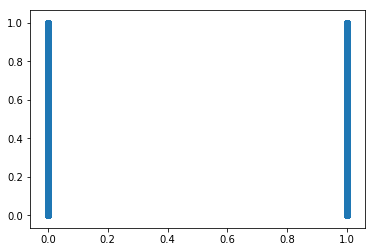

In [27]:
import matplotlib.pyplot as plt

plt.scatter(y_test, model.predict(X_test))




# GET The model to Predict



In [31]:
time_pct=['0.33','0.38','0.42','0.46','0.50','0.54','0.58','0.63','0.67','0.71','0.75']
numberofresults = len(time_pct)
numberofresults
waittime2=[]
bins1= [0,1,2,3,4,5,6,8,10,12,14,15,18,20,25,30,35,40,45,60,90]


def add_missing_dummy_columns( d, columns ):
    missing_cols = set( columns ) - set( d.columns )
    for c in missing_cols:
        d[c] = 0
        
        
for i in range(numberofresults): 

# GET The model to Predict
    df1 = pd.DataFrame({'date': ['2019-02-27']},index=[1])
    df1['date'] = pd.to_datetime(df1['date'])
    df1['time_pct'] = time_pct[i] 

    L = ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter','is_month_start','is_month_end','is_quarter_start']
    df1 = df1.join(pd.concat((getattr(df1['date'].dt, i).rename(i) for i in L), axis=1))
    df1['Holiday'] = df1['date'].isin(holidays)

    df1['month'] = df1['month'] / 12.0
    df1['day'] = df1['day'] / 31.0
    df1['dayofweek'] = df1['dayofweek'] / 6.0 
    df1['dayofyear'] = df1['dayofyear'] / 366.0
    df1['weekofyear'] = df1['weekofyear'] / 53.0
    df1['quarter'] = df1['quarter'] / 4.0
    df1['holidaynames'] = df1['date'].apply(lambda row: us_holidays.get(row))
    data1=df1[[ 'time_pct', 'month','day','dayofweek','weekofyear','quarter','is_month_start','is_month_end','is_quarter_start','Holiday','holidaynames']]
    data1 = pd.get_dummies(data1, columns=['holidaynames'])
    
    
    data2 = data1.copy()
    data2_binary_encoded = data2


    add_missing_dummy_columns(data2_binary_encoded, data.columns)        

    
    class_prob=model.predict(data2_binary_encoded)
   # print (class_prob)
#     wt=class_prob.item(0)
#     print(wt)
# # apend to store array
#     waittime2.append(wt)
    
  
    df2 = pd.DataFrame(class_prob)
    class_labels = df2.idxmax(axis=1)
    #print(df2.idxmax(axis=1)[0])

    bins1= [0,1,2,3,4,5,6,8,10,12,14,15,18,20,25,30,35,40,45,60,90]
    waittime=bins1[df2.idxmax(axis=1)[0]]
    
#     waittime

# apend to store array
    waittime2.append(waittime)

# #end for loop

time_of_day=[8,9,10,11,12,13,14,15,16,17,18]
print (waittime2)

    



[60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60]


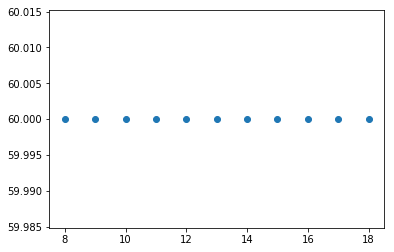

In [32]:
  import matplotlib.pyplot as plt

plt.scatter(time_of_day, waittime2)

<BarContainer object of 11 artists>

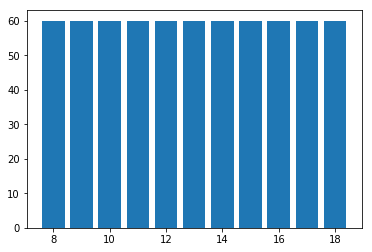

In [33]:
plt.bar(time_of_day, waittime2)